In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [136]:
housing = pd.read_csv('train.csv', index_col=0)
housing_test = pd.read_csv('test.csv', index_col=0)
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [128]:
housing.dtypes[housing.dtypes != 'object']

LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice          int64
dtype: object

In [127]:
conv_to_obj = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for col in conv_to_obj:
    housing[col] = housing[col].apply(str)
    housing_test[col] = housing_test[col].apply(str)

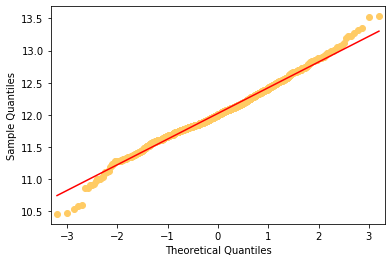

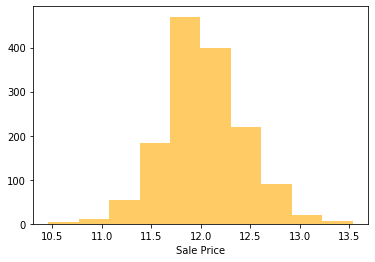

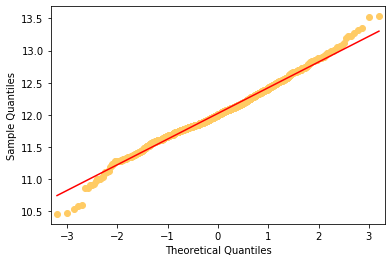

In [15]:
plt.xlabel('Sale Price')
plt.hist(np.log(housing['SalePrice']), color='#ffcb64')
sm.qqplot(np.log(housing['SalePrice']),color='#ffcb64', line='s')

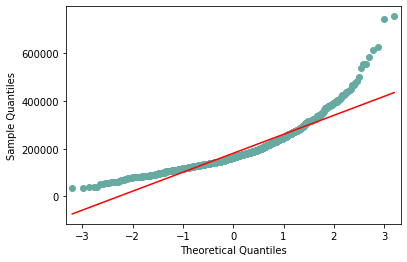

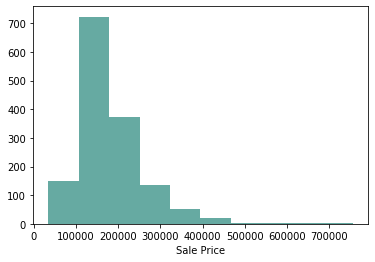

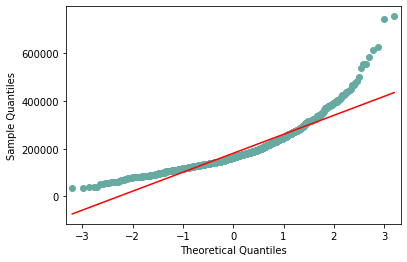

In [11]:
plt.xlabel('Sale Price')
plt.hist(housing['SalePrice'], color='#66aaa2')
sm.qqplot(housing['SalePrice'],color='#66aaa2', line='s')

<BarContainer object of 19 artists>

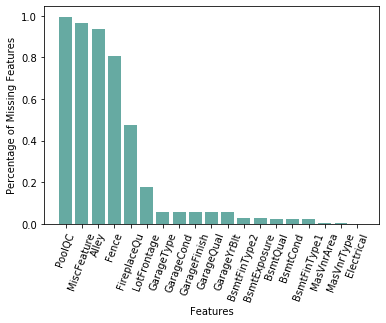

In [137]:
train_null_val_perc = housing.isnull().mean().sort_values(ascending=False)
train_null_val_perc = train_null_val_perc[train_null_val_perc > 0]

plt.xticks(rotation='70')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Features')
plt.bar(x=train_null_val_perc.index, height=train_null_val_perc, color='#66aaa2')

In [141]:
train_na = housing.loc[:,train_null_val_perc.index]
test_na = housing_test.loc[:,test_null_val_perc.index]
print(train_na.dtypes[train_na.dtypes != 'object'])
print(50*'-')
print(test_na.dtypes[test_na.dtypes != 'object'])

LotFrontage    float64
GarageYrBlt    float64
MasVnrArea     float64
dtype: object
--------------------------------------------------
LotFrontage     float64
GarageYrBlt     float64
MasVnrArea      float64
BsmtHalfBath    float64
BsmtFullBath    float64
BsmtFinSF2      float64
BsmtFinSF1      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
GarageArea      float64
GarageCars      float64
dtype: object


In [143]:
for col in train_na:
    if train_na[col] != 'object':
        housing[col] = housing[col].fillna(0)
    else:
        housing[col] = housing[col].fillna('None')

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: PoolQC, Length: 1460, dtype: object
Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
1456     NaN
1457     NaN
1458    Shed
1459     NaN
1460     NaN
Name: MiscFeature, Length: 1460, dtype: object
Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: Alley, Length: 1460, dtype: object
Id
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
        ...  
1456      NaN
1457    MnPrv
1458    GdPrv
1459      NaN
1460      NaN
Name: Fence, Length: 1460, dtype: object
Id
1       NaN
2        TA
3        TA
4        Gd
5        TA
       ... 
1456     TA
1457     TA
1458     Gd
1459    NaN
1460    NaN
Name: FireplaceQu, Length: 1460, dtype: object
Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
      

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Exterior2nd', 'SaleType', 'Exterior1st', 'KitchenQual',
       'GarageArea', 'GarageCars'],
      dtype='object')

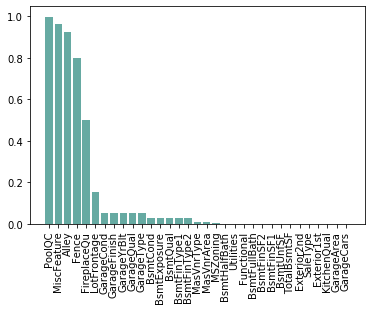

In [60]:
test_null_val_perc = housing_test.isnull().mean().sort_values(ascending=False)
test_null_val_perc = test_null_val_perc[test_null_val_perc > 0]
plt.xticks(rotation='90')
plt.bar(x=test_null_val_perc.index, height=test_null_val_perc, color='#66aaa2')
test_null_val_perc.index

In [417]:
housing_test['PoolQC'].notna()
housing_test.loc[housing_test['PoolQC'].notna()]['PoolQC']

Id
1975    Ex
2574    Ex
2711    Gd
Name: PoolQC, dtype: object

Id
1       2003.0
2       1976.0
3       2001.0
4       1998.0
5       2000.0
         ...  
1456    1999.0
1457    1978.0
1458    1941.0
1459    1950.0
1460    1965.0
Name: GarageYrBlt, Length: 1460, dtype: object

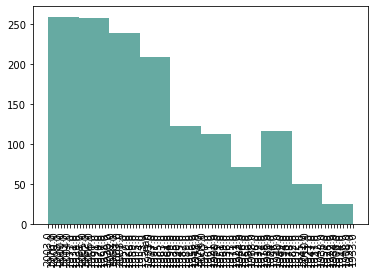

In [427]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(str)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
plt.hist(housing['GarageYrBlt'], color='#66aaa2')
plt.xticks(rotation='90')

housing['GarageYrBlt']

Id
1       196.0
2         0.0
3       162.0
4         0.0
5       350.0
        ...  
1456      0.0
1457    119.0
1458      0.0
1459      0.0
1460      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

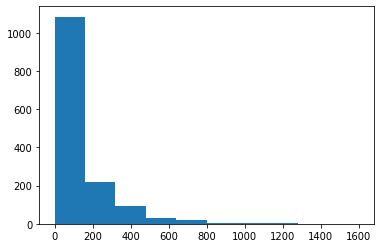

In [188]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
plt.hist(housing['MasVnrArea'])
housing['MasVnrArea']


Id
1       Unf
2       Unf
3       Unf
4       Unf
5       Unf
       ... 
1456    Unf
1457    Rec
1458    Unf
1459    Rec
1460    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

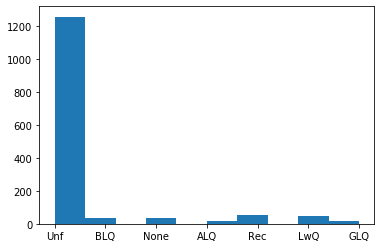

In [200]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('None')
plt.hist(housing['BsmtFinType2'])
housing['BsmtFinType2']

In [201]:
housing.isnull().mean().sort_values(ascending=False)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
                ... 
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
MSSubClass       0.0
Length: 80, dtype: float64

In [17]:
zero_cols = housing.loc[:, (housing == 0).any()].columns.to_list()
zero_cols

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

(array([1.077e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <a list of 10 Patch objects>)

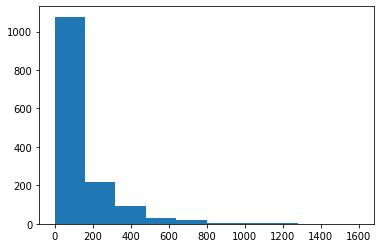

In [98]:
plt.hist(housing['MasVnrArea'])

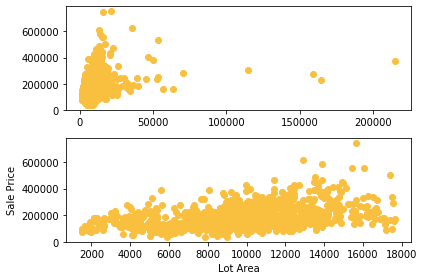

In [25]:
lot_area_Q1 = housing['LotArea'].quantile(.25)
lot_area_Q3 = housing['LotArea'].quantile(.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
lot_area_lower_bound = lot_area_Q1 - 1.5 * lot_area_IQR
lot_area_upper_bound = lot_area_Q3 + 1.5 * lot_area_IQR
lot_area_no_outlier = housing.loc[(housing['LotArea'] > lot_area_lower_bound) & (housing['LotArea'] < lot_area_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['LotArea'], y=housing['SalePrice'], color='#f9bf3e')
ax2.scatter(x=lot_area_no_outlier['LotArea'], y=lot_area_no_outlier['SalePrice'], color='#f9bf3e')
plt.ylabel('Sale Price')
plt.xlabel('Lot Area')
plt.tight_layout()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


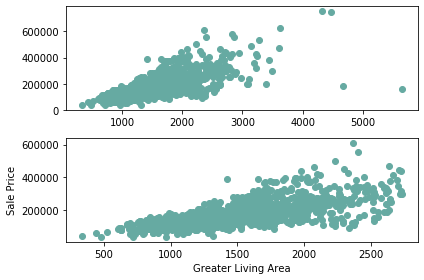

In [24]:
grlivarea_Q1 = housing['GrLivArea'].quantile(.25)
grlivarea_Q3 = housing['GrLivArea'].quantile(.75)
grlivarea_IQR = grlivarea_Q3 - grlivarea_Q1
grlivarea_lower_bound = grlivarea_Q1 - 1.5 * grlivarea_IQR
grlivarea_upper_bound = grlivarea_Q3 + 1.5 * grlivarea_IQR
grlivarea_no_outlier = housing.loc[(housing['GrLivArea'] > grlivarea_lower_bound) & (housing['GrLivArea'] < grlivarea_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['GrLivArea'], y=housing['SalePrice'], color='#66aaa2')
ax2.scatter(x=grlivarea_no_outlier['GrLivArea'], y=grlivarea_no_outlier['SalePrice'], color='#66aaa2')
plt.ylabel('Sale Price')
plt.xlabel('Greater Living Area')
plt.tight_layout()
grlivarea_no_outlier

In [206]:
sale_price = housing['SalePrice']
housing_copy = housing
housing_copy = housing_copy.drop('SalePrice',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal


In [279]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import math
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [221]:
housing_copy.select_dtypes(include =['int64', 'float64'])
num_housing = housing_copy.select_dtypes(include =['int64', 'float64'])
ridge.fit(num_housing, sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=num_housing.columns)
ridge.score(num_housing, sale_price)

the ridge intercept is: 520569.07


0.812721064374683

In [255]:
lot_area_sale_price = lot_area_no_outlier['SalePrice']
lot_area_no_outlier = lot_area_no_outlier.drop('SalePrice',axis=1)


KeyError: 'SalePrice'

In [322]:
grlivarea_sale_price = grlivarea_no_outlier['SalePrice']
grlivarea_no_outlier = grlivarea_no_outlier.drop('SalePrice',axis=1)


In [412]:
lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
lot_area_housing = lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
ridge.fit(lot_area_housing, lot_area_sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
# print(pd.Series(ridge.coef_, index=lot_area_housing.columns))
print(ridge.score(lot_area_housing, lot_area_sale_price))
ridge_r2 = ridge.score(lot_area_housing, lot_area_sale_price)
y_predict = ridge.predict(lot_area_housing)
rmse = np.sqrt(mean_squared_error(lot_area_sale_price, y_predict, squared=False))
print('the rmse is: %.2f' %(rmse))
print('the r-squared is: %.2f' %(ridge_r2))
print('the r-squared is: %.2f' %(ridge.coef_[0]))
print(ridge.predict(housing_test))


the ridge intercept is: -880598.44
0.870375626608764
the rmse is: 165.16
the r-squared is: 0.87
the r-squared is: -63.79


ValueError: could not convert string to float: 'RH'

In [353]:
lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
lot_area_housing = lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
lasso.fit(lot_area_housing, lot_area_sale_price)
print('the ridge intercept is: %.2f' %(lasso.intercept_))
# print(pd.Series(ridge.coef_, index=lot_area_housing.columns))
print(lasso.score(lot_area_housing, lot_area_sale_price))
lasso_r2 = lasso.score(lot_area_housing, lot_area_sale_price)
y_predict = lasso.predict(lot_area_housing)
rmse = np.sqrt(mean_squared_error(lot_area_sale_price, y_predict, squared=False))
print('the rmse is: %.2f' %(rmse))
print('the r-squared is: %.2f' %(lasso_r2))
print(lasso.)

the ridge intercept is: -885652.15
0.870376556187564
the rmse is: 165.16
the r-squared is: 0.87


In [343]:
grlivarea_no_outlier.select_dtypes(include =['int64', 'float64'])
grlivarea_housing = grlivarea_no_outlier.select_dtypes(include =['int64', 'float64'])
ridge.fit(grlivarea_housing, grlivarea_sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
print(ridge.score(grlivarea_housing, grlivarea_sale_price))
# r2 = ridge.score(grlivarea_housing, grlivarea_sale_price)
# y_predict = ridge.predict(grlivarea_housing)
# rmse = np.sqrt(mean_squared_error(y_predict, grlivarea_sale_price, squared=False))
# print('the rmse is: %.2f' %(rmse))
# print('the r-squared is: %.2f' %(ridge.score(grlivarea_housing, grlivarea_sale_price)))


the ridge intercept is: -0.00
1.0


In [223]:
ridge.set_params(alpha = 0, normalize=True)
ridge.fit(num_housing, sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=num_housing.columns)
ridge.score(num_housing, sale_price)

the ridge intercept is: 483769.20


0.8125531839546257

In [397]:
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeClassifier()
randomForest = ensemble.RandomForestClassifier()
bagging      = ensemble.BaggingClassifier()


In [399]:
lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
lot_area_housing = lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
randomForest.fit(lot_area_housing, lot_area_sale_price)
print(randomForest.score(lot_area_housing, lot_area_sale_price))
randomForest_r2 = randomForest.score(lot_area_housing, lot_area_sale_price)
randomForest_y_predict = randomForest.predict(lot_area_housing)
rmse = np.sqrt(mean_squared_error(lot_area_sale_price, randomForest_y_predict, squared=False))
print('the rmse is: %.2f' %(rmse))
print('the r-squared is: %.2f' %(randomForest_r2))

0.9992810927390366
the rmse is: 14.92
the r-squared is: 1.00


In [400]:
dt.fit(lot_area_housing, lot_area_sale_price)
print(dt.score(lot_area_housing, lot_area_sale_price))
dt.feature_importances_

0.9992810927390366


array([0.02069623, 0.04871102, 0.06397225, 0.02628229, 0.02678713,
       0.04131929, 0.05768703, 0.03192092, 0.04757665, 0.00633769,
       0.04742693, 0.04971287, 0.05766713, 0.02066   , 0.00072172,
       0.04932895, 0.01480171, 0.00505204, 0.0031414 , 0.01474714,
       0.01997189, 0.00288688, 0.04124581, 0.01883688, 0.01848404,
       0.06397239, 0.03938   , 0.03591193, 0.01645465, 0.00385061,
       0.01357459, 0.        , 0.00433032, 0.04729433, 0.03925525])

[0.02069623 0.04871102 0.06397225 0.02628229 0.02678713 0.04131929
 0.05768703 0.03192092 0.04757665 0.00633769 0.04742693 0.04971287
 0.05766713 0.02066    0.00072172 0.04932895 0.01480171 0.00505204
 0.0031414  0.01474714 0.01997189 0.00288688 0.04124581 0.01883688
 0.01848404 0.06397239 0.03938    0.03591193 0.01645465 0.00385061
 0.01357459 0.         0.00433032 0.04729433 0.03925525]


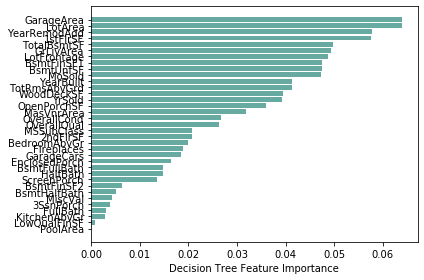

In [433]:
dt_idx = dt.feature_importances_.argsort()
print(dt.feature_importances_)
plt.barh(lot_area_housing.columns[dt_idx], dt.feature_importances_[dt_idx], color='#66aaa2')
plt.xlabel("Decision Tree Feature Importance")
plt.tight_layout()

[0.023179   0.0491647  0.0597485  0.02720965 0.02473108 0.05012713
 0.04581455 0.03289997 0.04450923 0.01389382 0.05562716 0.05283678
 0.05568789 0.02958111 0.00309079 0.05821556 0.01327986 0.00586457
 0.00886296 0.01100539 0.02020776 0.003156   0.03033776 0.01841815
 0.01303171 0.05607189 0.03554581 0.03983816 0.01501751 0.0038417
 0.01164124 0.00065355 0.00654104 0.04633072 0.03403729]


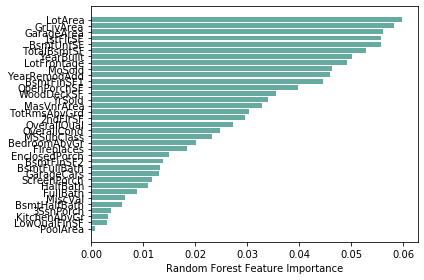

In [434]:
sorted_idx = randomForest.feature_importances_.argsort()
print(randomForest.feature_importances_)
plt.barh(lot_area_housing.columns[sorted_idx], randomForest.feature_importances_[sorted_idx], color='#66aaa2')
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()

In [367]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [372]:
lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
lot_area_housing = lot_area_no_outlier.select_dtypes(include =['int64', 'float64'])
regressor.fit(lot_area_housing, lot_area_sale_price)
print(regressor.score(lot_area_housing, lot_area_sale_price))
xgb_r2 = regressor.score(lot_area_housing, lot_area_sale_price)
xgb_y_predict = regressor.predict(lot_area_housing)
rmse = np.sqrt(mean_squared_error(lot_area_sale_price, xgb_y_predict, squared=False))
print('the rmse is: %.2f' %(rmse))
print('the r-squared is: %.2f' %(xgb_r2))

0.9807649524344908
the rmse is: 102.51
the r-squared is: 0.98
